In [1]:
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
path='Fnt'
folders=os.listdir(path)
for i in range(0, len(folders)):
    loopPath=path+'/'+folders[i]
    images=os.listdir(loopPath)
    for j in range(0, len(images)):
        imgPath=loopPath+'/'+images[j]
        im=cv2.imread(imgPath)
        im=cv2.resize(im,(28,28))
        im=cv2.bitwise_not(im)
        cv2.imwrite(imgPath,im)
print('done')

In [ ]:
path='data/train'
folders=os.listdir(path)
for i in range(0, len(folders)):
    loopPath=path+'/'+folders[i]
    images=os.listdir(loopPath)
    for j in range(0, len(images)):
        imgPath=loopPath+'/'+images[j]
        destPath=loopPath+'/'+folders[i]+'_'+str(j)+'.png'
        os.rename(imgPath,destPath)
print('done')

In [2]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

In [3]:
trainPath='data/train'
validationPath='data/val'
classList=os.listdir(trainPath)

In [4]:
print(classList)

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_A', 'class_B', 'class_C', 'class_D', 'class_E', 'class_F', 'class_G', 'class_H', 'class_I', 'class_J', 'class_K', 'class_L', 'class_M', 'class_N', 'class_O', 'class_P', 'class_Q', 'class_R', 'class_S', 'class_T', 'class_U', 'class_V', 'class_W', 'class_X', 'class_Y', 'class_Z']


In [5]:
trainBatches=ImageDataGenerator().flow_from_directory(trainPath, target_size=(28,28), batch_size=1, class_mode='categorical')
validationBatches=ImageDataGenerator().flow_from_directory(validationPath, target_size=(28,28), batch_size=1, class_mode='categorical')

Found 4945 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [8]:
print(validationBatches.class_indices)

{'class_0': 0, 'class_1': 1, 'class_2': 2, 'class_3': 3, 'class_4': 4, 'class_5': 5, 'class_6': 6, 'class_7': 7, 'class_8': 8, 'class_9': 9, 'class_A': 10, 'class_B': 11, 'class_C': 12, 'class_D': 13, 'class_E': 14, 'class_F': 15, 'class_G': 16, 'class_H': 17, 'class_I': 18, 'class_J': 19, 'class_K': 20, 'class_L': 21, 'class_M': 22, 'class_N': 23, 'class_O': 24, 'class_P': 25, 'class_Q': 26, 'class_R': 27, 'class_S': 28, 'class_T': 29, 'class_U': 30, 'class_V': 31, 'class_W': 32, 'class_X': 33, 'class_Y': 34, 'class_Z': 35}


In [10]:
model=Sequential([
    Conv2D(32,(24,24), input_shape=(28,28,3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(36,activation='softmax'),
])

In [14]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history=model.fit_generator(trainBatches, steps_per_epoch=4945,validation_data=validationBatches, validation_steps=216,epochs=20)

Epoch 1/20
4945/4945 [==============================] - 132s 27ms/step - loss: 4.7378 - accuracy: 0.4036 - val_loss: 1.2651 - val_accuracy: 0.6574
Epoch 2/20
4945/4945 [==============================] - 101s 20ms/step - loss: 1.1723 - accuracy: 0.7339 - val_loss: 0.8977 - val_accuracy: 0.7917
Epoch 3/20
4945/4945 [==============================] - 63s 13ms/step - loss: 0.9417 - accuracy: 0.8184 - val_loss: 1.3078 - val_accuracy: 0.8426
Epoch 4/20
4945/4945 [==============================] - 64s 13ms/step - loss: 0.7900 - accuracy: 0.8649 - val_loss: 0.3747 - val_accuracy: 0.8981
Epoch 5/20
4945/4945 [==============================] - 62s 13ms/step - loss: 0.7096 - accuracy: 0.8920 - val_loss: 0.2591 - val_accuracy: 0.9352
Epoch 6/20
4945/4945 [==============================] - 83s 17ms/step - loss: 0.5889 - accuracy: 0.9070 - val_loss: 0.2911 - val_accuracy: 0.9259
Epoch 7/20
4945/4945 [==============================] - 122s 25ms/step - loss: 0.6203 - accuracy: 0.9193 - val_loss: 0.333

In [16]:
model.save('myanpr.h5')
print('SAVED')

SAVED


In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


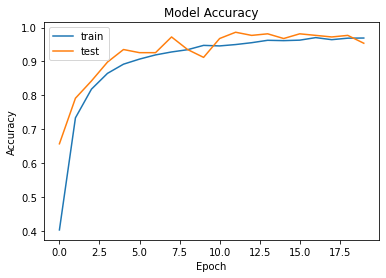

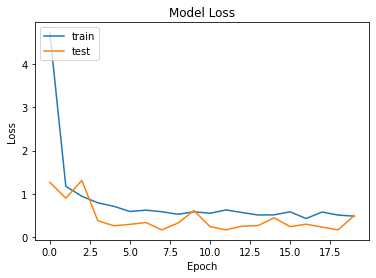

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [86]:
from keras.models import load_model
pMq=load_model('Rupammyanpr.h5')
print(pM.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        55328     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 36)                4644      
Total params: 862,916
Trainable params: 862,916
Non-trainable params: 0
________________________________________________

In [22]:
import pandas as pd
import numpy as np

In [23]:
def extractPlate(img):
    copyImg=img.copy()
    casVar=cv2.CascadeClassifier('indian_license_plate.xml')
    plateCoordinates=casVar.detectMultiScale(copyImg, scaleFactor=1.3, minNeighbors=7)
    print(plateCoordinates)
    for (x,y,w,h) in plateCoordinates:
        plate=copyImg[y:y+h, x:x+w, :]
    return plate

[[ 77  89 149  37]]


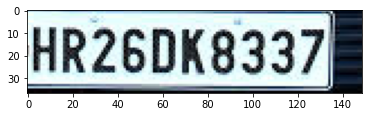

In [25]:
img=cv2.imread('img1.png')
plt.imshow(img)
out=extractPlate(img)
plt.imshow(out)

In [26]:
cv2.imwrite('outputPlate.jpg',out)


True

True

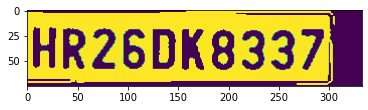

In [29]:
ins=cv2.imread('outputPlate.jpg')
ins=cv2.resize(ins,(333,75))
ins=cv2.cvtColor(ins,cv2.COLOR_BGR2GRAY)
dim,img_binary=cv2.threshold(ins,200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
ins=cv2.erode(img_binary,(3,3))
ins=cv2.dilate(ins,(3,3))
plt.imshow(ins)
cv2.imwrite('dialated.jpg',ins)

In [31]:
plateWidth=ins.shape[0]
plateHeight=ins.shape[1]
print(plateHeight, plateWidth)

333 75


In [32]:
dimentions=plateWidth/6, plateWidth/2, plateHeight/10, 2*plateHeight/3
print(dimentions)

(12.5, 37.5, 33.3, 222.0)


In [48]:
cntrs,dim=cv2.findContours(ins.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cntrs=sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
coImg=ins.copy()
cv2.drawContours(coImg,cntrs, -1, (233,255,255),3)


In [72]:
xcx=[]
tc=[]
for cntr in cntrs:
    ix, iy, iw, ih= cv2.boundingRect(cntr)
    if iw > dimentions[0] and iw < dimentions[1] and ih > dimentions[2] and ih < dimentions[3]:
        xcx.append(ix)
        chcop=np.zeros((44,24))
        char= ins[iy:iy+ih, ix: ix+iw]
        char=cv2.resize(char,(20,40))
        char=cv2.subtract(255, char)
        chcop[2:42, 2:22]=char
        tc.append(chcop)
indices= sorted(range(len(xcx)), key=lambda k: xcx[k])
imgResCopy=[]
for idx in indices:
    imgResCopy.append(tc[idx])
tc=np.array(imgResCopy)
for i in range(0, len(tc)):
    name='Segment_'+str(i)+'.png'
    cv2.imwrite(name,tc[i])

Prediction/Segment_0.png
H
Prediction/Segment_1.png
R
Prediction/Segment_2.png
2
Prediction/Segment_3.png
6
Prediction/Segment_4.png
D
Prediction/Segment_5.png
X
Prediction/Segment_6.png
8
Prediction/Segment_7.png
3
Prediction/Segment_8.png
3
Prediction/Segment_9.png
7


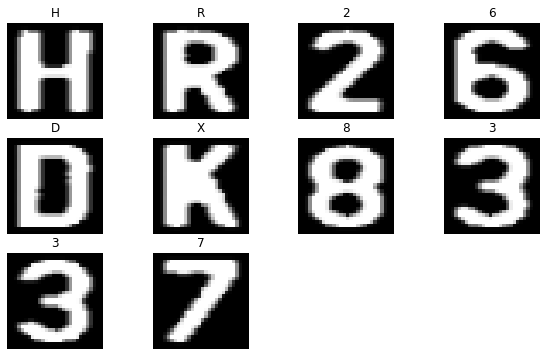

In [105]:
ch='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.figure(figsize=(10,6))
for i in range(0,len(tc)):
    path='Prediction'
    images=os.listdir(path)
    imgPath=path+'/'+images[i]
    print(imgPath)
    pre=cv2.imread(imgPath)
    pre=cv2.resize(pre, (28,28))
    pre1=pre.reshape(1,28,28,3)
    Y=pMq.predict_classes(pre1)[0]
    print(ch[Y])
    plt.subplot(3,4,i+1)
    plt.imshow(pre)
    plt.title(ch[Y])
    plt.axis('off')